### Background and Context

* Can you differentiate a weed from a crop seedling?The ability to do so effectively can mean better crop yields and better stewardship of the environment.The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of approximately 960 unique plants belonging to 12 species at several growth stages.We're hosting this dataset as a Kaggle competition in order to give it wider exposure, to give the community an opportunity to experiment with different image recognition techniques, as well to provide a place to cross-pollenate ideas.

#### Data Description:
* You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its
unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's
species from a photo.

#### Dataset:
The dataset can be download from Olympus.
The data file names are:
 * images.npy
 * Label.csv
			
					
					
					
					


### Index

- <a href = #link1>Overview of the dataset</a>


- <a href = #link2>EDA</a> 


- <a href = #link3>Data Pre-processing</a>


- <a href = #link4>Split the data</a> 


- <a href = #link5>Model building : Build Neural Network</a>


- <a href = #link6>Model Performance Evaluation</a>


- <a href = #link7>Business Recommendations/Actionable Insights</a>

## <a id = "link1"></a>*Overview* of the dataset 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import cv2
import os
from glob import glob
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import adam_v2 #optimiers for optimizing the model
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from keras.datasets import mnist
from PIL import Image
import random
%matplotlib inline
random.seed(0)

In [3]:
image_array = np.load('/content/drive/My Drive/images.npy')
Labels= pd.read_csv('/content/drive/My Drive/Labels.csv')

In [4]:
image_array.shape


(4750, 128, 128, 3)

The image array has 4750 images that 128 by 128 in RGB

In [5]:
Labels.shape

(4750, 1)

The labels dataframe has 4750 labels with index

In [6]:
Labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


In [7]:
Labels.isna().sum()

Label    0
dtype: int64

In [8]:
Labels.nunique()

Label    12
dtype: int64

there are 12 different types of plants classes

In [9]:
Labels.describe().T

,count,unique,top,freq
Label,4750,12,Loose Silky-bent,654


In [71]:
Labels = Labels.copy(deep = True)

In [74]:
pd.value_counts(df.Label)

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: Label, dtype: int64

As you can see that not all the classes have the same amount of images which could be seen as not balanced 

In [11]:
img = image_array.copy

In [12]:
Small_flowered_Cranesbill=[],
Fat_Hen=[],
Shepherds_Purse=[],
Common_wheat=[],
Common_Chickweed=[],
Charlock=[],
Cleavers=[],
Scentless_Mayweed=[],
Sugar_beet=[],
Maize=[],
Black_grass=[],
Loose_Silky_bent=[],

In [15]:
image_array.reshape((-1 ,1,128, 128,))

array([[[[ 35,  52,  78, ..., 111,  69, 102],
         [115,  57,  89, ...,  82,  96,  49],
         [ 72,  87,  29, ...,  80,  95, 109],
         ...,
         [ 57,  71,  40, ...,  94, 117, 129],
         [ 32,  40,  58, ..., 117,  52,  90],
         [119,  53,  91, ...,  62,  80,  34]]],


       [[[ 57,  73,  33, ...,  87, 109, 125],
         [ 36,  46,  66, ..., 123,  56,  94],
         [121,  55,  93, ...,  82,  95,  42],
         ...,
         [ 88,  58,  77, ...,  49,  75,  27],
         [ 49,  70,  29, ...,  47,  56,  70],
         [ 38,  51,  75, ...,  81,  44,  58]]],


       [[[ 73,  64,  80, ...,  53,  77,  33],
         [ 49,  70,  30, ...,  54,  64,  76],
         [ 33,  45,  64, ...,  86,  45,  57],
         ...,
         [ 44,  58,  70, ..., 115,  70,  92],
         [114,  71,  92, ...,  67,  80,  51],
         [ 68,  83,  49, ...,  61,  79,  96]]],


       ...,


       [[[ 53,  66,  84, ...,  65,  13,  21],
         [ 48,  26,  48, ...,  73,  91,  72],
         [ 9

Here we are re shaping the image array into a 3d array 128 by 128 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


In [17]:
image_array.shape

(4750, 128, 128, 3)

                       Label
0  Small-flowered Cranesbill


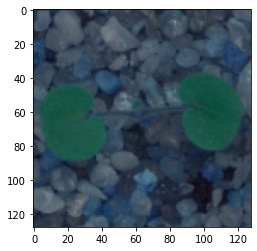

In [18]:
plt.imshow(image_array[0], cmap='gray')
print(Labels.loc[[0]])

       Label
500  Fat Hen


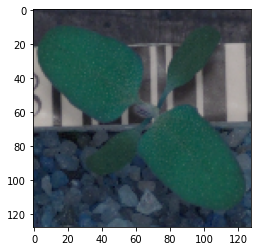

In [20]:
plt.imshow(image_array[500], cmap='gray')
print(Labels.loc[[500]])

                Label
1005  Shepherds Purse


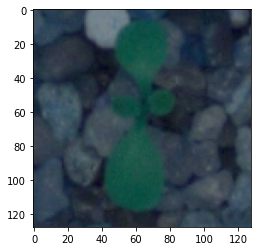

In [19]:
plt.imshow(image_array[1005], cmap='gray')
print(Labels.loc[[1005]])

             Label
1300  Common wheat


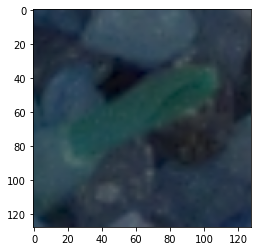

In [22]:
plt.imshow(image_array[1300], cmap='gray')
print(Labels.loc[[1300]])

             Label
1306  Common wheat


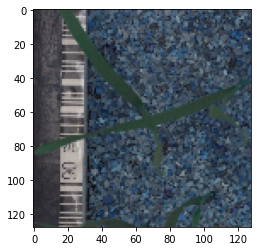

In [23]:
plt.imshow(image_array[1306], cmap='gray')
print(Labels.loc[[1306]])

                 Label
2000  Common Chickweed


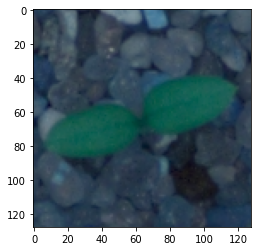

In [24]:
plt.imshow(image_array[2000], cmap='gray')
print(Labels.loc[[2000]])

                 Label
2005  Common Chickweed


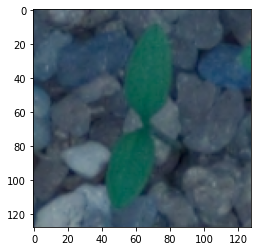

In [25]:

plt.imshow(image_array[2005], cmap='gray')
print(Labels.loc[[2005]])

         Label
2200  Charlock


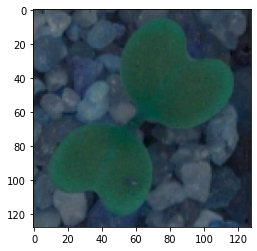

In [26]:
plt.imshow(image_array[2200], cmap='gray')
print(Labels.loc[[2200]])

         Label
2205  Charlock


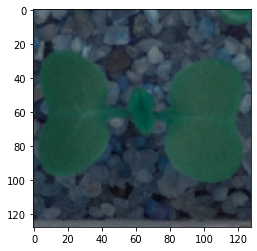

In [27]:
plt.imshow(image_array[2205], cmap='gray')
print(Labels.loc[[2205]])

         Label
2500  Cleavers


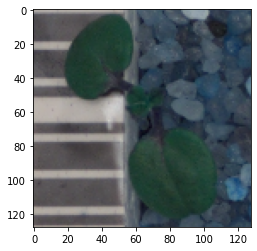

In [28]:
plt.imshow(image_array[2500], cmap='gray')
print(Labels.loc[[2500]])

         Label
2505  Cleavers


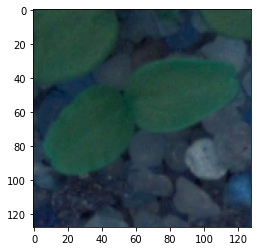

In [29]:
plt.imshow(image_array[2505], cmap='gray')
print(Labels.loc[[2505]])

                  Label
2999  Scentless Mayweed


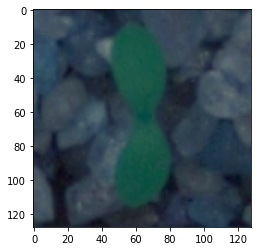

In [30]:
plt.imshow(image_array[2999], cmap='gray')
print(Labels.loc[[2999]])

                  Label
3000  Scentless Mayweed


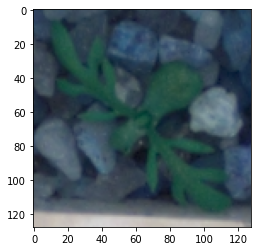

In [31]:
plt.imshow(image_array[3000], cmap='gray')
print(Labels.loc[[3000]])

           Label
3500  Sugar beet


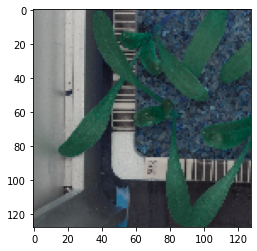

In [32]:

plt.imshow(image_array[3500], cmap='gray')
print(Labels.loc[[3500]])

Label    Sugar beet
Name: 3450, dtype: object


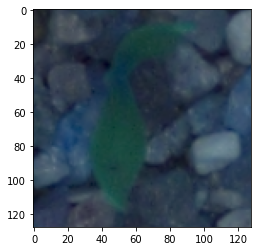

In [33]:
plt.imshow(image_array[3450], cmap='gray')
print(Labels.loc[3450])

      Label
3801  Maize


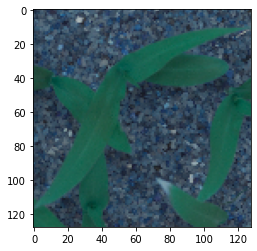

In [34]:
plt.imshow(image_array[3801], cmap='gray')
print(Labels.loc[[3801]])

      Label
3700  Maize


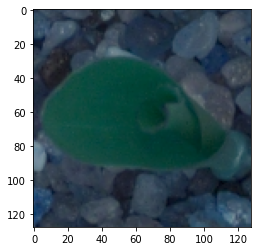

In [35]:
plt.imshow(image_array[3700], cmap='gray')
print(Labels.loc[[3700]])

            Label
3999  Black-grass


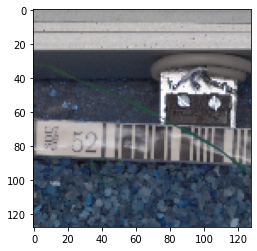

In [36]:
plt.imshow(image_array[3999], cmap='gray')
print(Labels.loc[[3999]])

            Label
4000  Black-grass


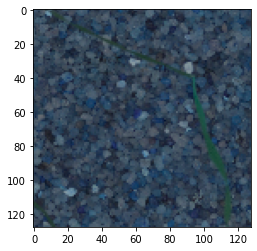

In [37]:
plt.imshow(image_array[4000], cmap='gray')
print(Labels.loc[[4000]])

                 Label
4749  Loose Silky-bent


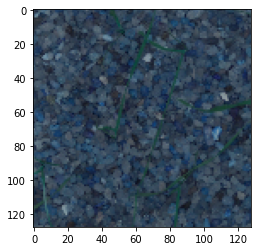

In [38]:

plt.imshow(image_array[4749], cmap='gray')
print(Labels.loc[[4749]])

                 Label
4500  Loose Silky-bent


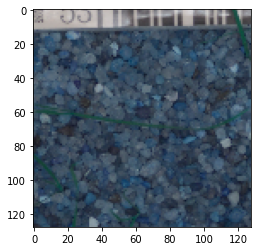

In [39]:
plt.imshow(image_array[4500], cmap='gray')
print(Labels.loc[[4500]])

In [41]:
print('The shape of image is: ', image_array[1000].shape)
# Extracting the height and width of an image 
h, w = image_array[1000].shape[:2] 
# Displaying the height and width 
print("Height = {},  Width = {}".format(h, w)) 

The shape of image is:  (128, 128, 3)
Height = 128,  Width = 128


Here we printed out all the images in RGB with labels 128 by 128  in RGB

In [40]:
np.mean(image_array,dtype=np.float64, axis=(0,1))

array([[60.9218273 , 75.59078454, 89.81523026],
       [60.70178783, 75.43243421, 89.61127961],
       [60.37017928, 75.2544227 , 89.31684704],
       [60.03340132, 75.12466612, 89.03594572],
       [59.62580099, 74.95550164, 88.71124671],
       [59.25166283, 74.83285033, 88.41574013],
       [58.84592105, 74.70112171, 88.10849013],
       [58.46899507, 74.61604112, 87.82979112],
       [58.07813487, 74.53553947, 87.55488487],
       [57.74107237, 74.49549836, 87.32179276],
       [57.42272533, 74.46842434, 87.09086349],
       [57.03283882, 74.37955757, 86.80270724],
       [56.74305099, 74.36897039, 86.60531414],
       [56.44555428, 74.33696711, 86.38621053],
       [56.15808553, 74.3073273 , 86.16969079],
       [55.82365789, 74.20673849, 85.8947352 ],
       [55.53087993, 74.15712171, 85.66906743],
       [55.32111349, 74.19563487, 85.51517599],
       [55.09810197, 74.20372368, 85.35506908],
       [54.88134375, 74.21175822, 85.20092928],
       [54.75621382, 74.28527303, 85.113

here is the mean of every image in the image array

In [42]:
print('Image Matrix: \n', image_array[1000])
print(type(image_array[1000]))
print(Labels.loc[[1000]])

Image Matrix: 
 [[[ 22  93  70]
  [  1  80  59]
  [ 10  85  68]
  ...
  [ 80  98 116]
  [ 87 103 121]
  [ 85 105 123]]

 [[ 29  91  74]
  [ 24  89  70]
  [ 25  90  69]
  ...
  [ 78  98 117]
  [ 81 101 119]
  [ 90 115 133]]

 [[ 21  87  68]
  [ 22  91  70]
  [ 25  93  73]
  ...
  [ 48  74 101]
  [ 64  88 111]
  [ 65  94 113]]

 ...

 [[ 78 103 119]
  [ 81 110 130]
  [ 98 121 134]
  ...
  [ 64  83  88]
  [ 58  79  82]
  [ 15  65  52]]

 [[ 75  97 114]
  [ 60  89 109]
  [ 82 107 124]
  ...
  [ 69  86  96]
  [ 58  74  82]
  [ 13  61  50]]

 [[ 63  88 117]
  [ 50  78 116]
  [ 77 102 125]
  ...
  [ 58  75  87]
  [ 61  79  85]
  [ 18  60  55]]]
<class 'numpy.ndarray'>
                Label
1000  Shepherds Purse


## <a id = "link3"></a> Data Pre-processing

In [43]:
Labels[['Label']].apply(lambda x: x.astype('category'))

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [44]:
Labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


In [45]:
pd.get_dummies(Labels.Label)
print(Labels.shape)

(4750, 1)


In [46]:
print(len(image_array)) # Check the number of rows in the dataset.
print(image_array.shape) # The shape of dataset tells us that there are 4750 numbers, each of which has 128,128 pixels. (It's the shape of the numpy array)

4750
(4750, 128, 128, 3)


In [47]:
# Normalizing pixel values  
image_array= image_array/255.0  

In [48]:
print(image_array.shape)

(4750, 128, 128, 3)


## <a id = "link1"></a>Split the data

In [49]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=image_array

# Specify the target labels and flatten array
y= Labels


In [50]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

y_train =  np.array(y_train)
y_test =  np.array(y_test)

In [51]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [52]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)
print('Val', X_val.shape, y_val.shape)

Train (2493, 128, 128, 3) (2493, 1)
Test (1425, 128, 128, 3) (1425, 1)
Val (832, 128, 128, 3) (832, 1)


### **One-Hot Label Encoding**

In [53]:
from sklearn.preprocessing import LabelEncoder

# Label encode input variables

label_encoder = LabelEncoder()
label_encoder.fit(y_train.ravel())
y_train = label_encoder.transform(y_train.ravel())
y_test = label_encoder.transform(y_test.ravel())
y_val = label_encoder.transform(y_val.ravel())

In [54]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(2493,)
(1425,)
(832,)
(2493, 128, 128, 3)
(1425, 128, 128, 3)
(832, 128, 128, 3)


In [55]:
# Set input shape
input_shape = X_train[1].shape
img_width, img_height = input_shape[1], input_shape[1]
X_shape = (img_width, img_height, 3)


## <a id = "link5">Model building : Build Neural Network</a>

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D
from keras.optimizers import adam_v2 #optimiers for optimizing the model
from tensorflow.keras import losses, optimizers
from keras.layers import Input

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#
y_train=np.array(y_train)
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "softmax"))
#optimizer = 'adam' (lr=0.001, beta_1=0.9, beta_2=0.999)
#model.compile(loss='softmax', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 200  
batch_size = 64

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       1

In [57]:
history=model.fit(X_train, 
          y_train,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=4,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  

Epoch 1/30
499/499 [==============================] - 219s 436ms/step - loss: 0.0000e+00 - accuracy: 0.0812 - val_loss: 0.0000e+00 - val_accuracy: 0.0862

Epoch 00001: val_accuracy improved from -inf to 0.08617, saving model to best_model.h5
Epoch 2/30
499/499 [==============================] - 213s 427ms/step - loss: nan - accuracy: 0.0762 - val_loss: nan - val_accuracy: 0.0581

Epoch 00002: val_accuracy did not improve from 0.08617
Epoch 3/30
499/499 [==============================] - 213s 426ms/step - loss: nan - accuracy: 0.0502 - val_loss: nan - val_accuracy: 0.0581

Epoch 00003: val_accuracy did not improve from 0.08617
Epoch 4/30
499/499 [==============================] - 212s 426ms/step - loss: nan - accuracy: 0.0502 - val_loss: nan - val_accuracy: 0.0581

Epoch 00004: val_accuracy did not improve from 0.08617
Epoch 5/30
499/499 [==============================] - 215s 431ms/step - loss: nan - accuracy: 0.0502 - val_loss: nan - val_accuracy: 0.0581

Epoch 00005: val_accuracy did

In [58]:
model.evaluate(X_test,np.array(y_test))

45/45 [==============================] - 32s 697ms/step - loss: nan - accuracy: 0.0561


[nan, 0.05614035204052925]

As you can see this model did not preform well at all. The accuracy came out to .05 . Thier are many issues with this model, but i think i over comlicatied the layer. I think we should that a more simple atempt like CNN classifier

### Classifier CNN

In [62]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with   64 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 128 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'valid'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 10 neurons to predict the categorical classifcation
classifier.add(Dense(units = 1, activation = 'softmax'))

classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28800)            

In [63]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [64]:


history1 = classifier.fit(X_train, 
          y_train,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=4,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)

Epoch 1/30
499/499 [==============================] - 182s 364ms/step - loss: 0.0000e+00 - accuracy: 0.0812 - val_loss: 0.0000e+00 - val_accuracy: 0.0862

Epoch 00001: val_accuracy did not improve from 0.08617
Epoch 2/30
499/499 [==============================] - 184s 368ms/step - loss: 0.0000e+00 - accuracy: 0.0812 - val_loss: 0.0000e+00 - val_accuracy: 0.0862

Epoch 00002: val_accuracy did not improve from 0.08617
Epoch 3/30
499/499 [==============================] - 184s 369ms/step - loss: 0.0000e+00 - accuracy: 0.0812 - val_loss: 0.0000e+00 - val_accuracy: 0.0862

Epoch 00003: val_accuracy did not improve from 0.08617
Epoch 4/30
499/499 [==============================] - 188s 377ms/step - loss: 0.0000e+00 - accuracy: 0.0812 - val_loss: 0.0000e+00 - val_accuracy: 0.0862

Epoch 00004: val_accuracy did not improve from 0.08617
Epoch 5/30
499/499 [==============================] - 191s 383ms/step - loss: 0.0000e+00 - accuracy: 0.0812 - val_loss: 0.0000e+00 - val_accuracy: 0.0862

Epoch

As you can see model did better then the last but still very poor when it cames to accuracy.


## <a id = "link3"></a>Model Performance Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


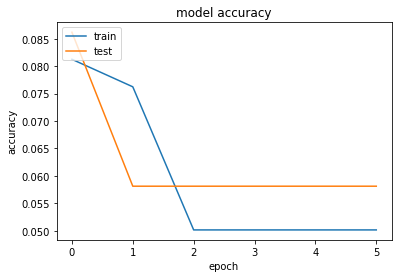

In [65]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As you can see this model is overfit  and to fix this we need to make the layers more complex

In [67]:
model.evaluate(X_test,y_test)

45/45 [==============================] - 32s 703ms/step - loss: nan - accuracy: 0.0561


[nan, 0.05614035204052925]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


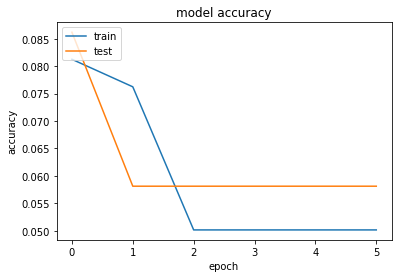

In [66]:
print(history1.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As you can see this model is overfit  and to fix this we need to make the layers more complex

In [68]:
classifier.evaluate(X_test,y_test)

45/45 [==============================] - 13s 283ms/step - loss: 0.0000e+00 - accuracy: 0.0863


[0.0, 0.08631578832864761]

## <a id = "link7"></a> Business Recommendations/Actionable Insights

There is still scope for improvement in the test accuracy.We can use different architectures that can be built and hyperparamter tuning can be performed to obtain a better brain label classifier. We can also visualize the filters better so that we can understand why the model does not do well in the identification of the plant labels.